In [1]:
import os
import glob
import pandas as pd

In [2]:
# Define working directory
os.chdir(r"C:\Users\Cristina Bardan\Desktop\Repositories\FinalProject-Spotify\Original_data")

In [3]:
# Use glob to match the pattern ‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# Combine all files in the list and export as CSV
df = pd.concat([pd.read_csv(f) for f in all_filenames ])
df.reset_index(drop=True, inplace=True)

In [4]:
df2 = df.drop(['track', 'artist', 'uri'], axis=1)

In [5]:
#Validation of correlation between variables
import numpy as np 
df3=df2.corr()
df3.sort_values('target').target

instrumentalness   -0.407638
acousticness       -0.246036
duration_ms        -0.073820
sections           -0.059997
liveness           -0.051445
chorus_hit         -0.046409
speechiness        -0.040835
key                 0.009883
tempo               0.032649
mode                0.079614
time_signature      0.104884
energy              0.177142
valence             0.251147
loudness            0.286034
danceability        0.346097
target              1.000000
Name: target, dtype: float64

In [6]:
selected_index = df3[(df3.target >= 0.1) | (df3.target <= -0.1)].index.values
selected_index

array(['danceability', 'energy', 'loudness', 'acousticness',
       'instrumentalness', 'valence', 'time_signature', 'target'],
      dtype=object)

In [7]:
# duration_ms sections liveness chorus_hit speechiness key tempo     mode         
data = df2[selected_index].copy()
X = data.iloc[:,:-1]
y = data.target
print(X.shape, y.shape)

(41106, 7) (41106,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

## Data Preprocessing

In [9]:
#Scale features (X) using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

X_train_scaled

array([[7.89473684e-01, 5.22833946e-01, 7.61722362e-01, ...,
        6.29000000e-02, 8.58433735e-01, 8.00000000e-01],
       [5.40485830e-01, 8.30941168e-01, 7.79213918e-01, ...,
        2.30000000e-04, 9.65863454e-01, 8.00000000e-01],
       [5.00000000e-01, 6.65883728e-01, 7.45513897e-01, ...,
        5.69000000e-05, 7.01807229e-01, 8.00000000e-01],
       ...,
       [5.76923077e-01, 3.67779987e-01, 6.83038663e-01, ...,
        0.00000000e+00, 4.46787149e-01, 8.00000000e-01],
       [4.19028340e-01, 1.60707926e-01, 5.08198577e-01, ...,
        2.23000000e-04, 4.24698795e-01, 8.00000000e-01],
       [2.95546559e-01, 2.48738561e-01, 6.79378078e-01, ...,
        4.43000000e-05, 1.07429719e-01, 6.00000000e-01]])

One-hot encode the labels

In [10]:
#One-hot encode output labels (y)
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

y_train_categorical

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

## Creating and defining our Deep Learning Model Architecture

In [11]:
#Create a sequential model
from tensorflow.keras.models import Sequential
model = Sequential() 

from tensorflow.keras.layers import Dense
number_inputs = 7

#Create hidden layers
model.add(Dense(units=14,activation='relu', input_dim=number_inputs))
model.add(Dense(units=120,activation='relu'))
model.add(Dense(units=80,activation='relu'))
model.add(Dense(units=20,activation='relu'))

#Create output layer
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax')) 

Number of Hidden Nodes 
https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw#:~:text=The%20number%20of%20hidden%20neurons,size%20of%20the%20input%20layer.

In [12]:
#Model Summary
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                112       
_________________________________________________________________
dense_1 (Dense)              (None, 120)               1800      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1620      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 42        
Total params: 13,254
Trainable params: 13,254
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compile the Model
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [15]:
print(X.shape, y.shape)

(41106, 7) (41106,)


In [16]:
#Training the Model
history = model.fit(X_train_scaled, y_train_categorical, epochs=700, batch_size=1000, shuffle=True, verbose=2)
# thing = model.predict()

Epoch 1/700
31/31 - 0s - loss: 0.6259 - accuracy: 0.6619
Epoch 2/700
31/31 - 0s - loss: 0.5294 - accuracy: 0.7339
Epoch 3/700
31/31 - 0s - loss: 0.5212 - accuracy: 0.7371
Epoch 4/700
31/31 - 0s - loss: 0.5132 - accuracy: 0.7414
Epoch 5/700
31/31 - 0s - loss: 0.5093 - accuracy: 0.7447
Epoch 6/700
31/31 - 0s - loss: 0.5077 - accuracy: 0.7438
Epoch 7/700
31/31 - 0s - loss: 0.5063 - accuracy: 0.7440
Epoch 8/700
31/31 - 0s - loss: 0.5056 - accuracy: 0.7445
Epoch 9/700
31/31 - 0s - loss: 0.5043 - accuracy: 0.7461
Epoch 10/700
31/31 - 0s - loss: 0.5033 - accuracy: 0.7472
Epoch 11/700
31/31 - 0s - loss: 0.5033 - accuracy: 0.7468
Epoch 12/700
31/31 - 0s - loss: 0.5015 - accuracy: 0.7486
Epoch 13/700
31/31 - 0s - loss: 0.5014 - accuracy: 0.7481
Epoch 14/700
31/31 - 0s - loss: 0.5023 - accuracy: 0.7470
Epoch 15/700
31/31 - 0s - loss: 0.4991 - accuracy: 0.7497
Epoch 16/700
31/31 - 0s - loss: 0.4996 - accuracy: 0.7491
Epoch 17/700
31/31 - 0s - loss: 0.4987 - accuracy: 0.7503
Epoch 18/700
31/31 - 0s

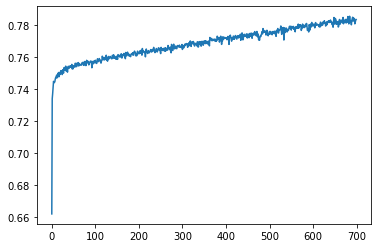

In [17]:
from matplotlib import pyplot as plt 
# print(history.history.keys())

plt.plot(history.history['accuracy'])

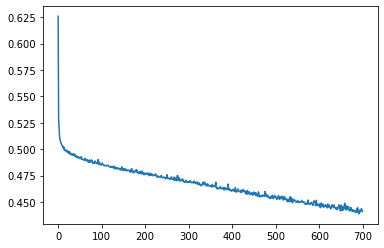

In [18]:
plt.plot(history.history['loss'])

## Validation of the Model

In [19]:
#Evaluate the Model using the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
    
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 1s - loss: 0.5224 - accuracy: 0.7491
Loss: 0.5223674178123474, Accuracy: 0.7491486072540283


## Saving the Trained Model

In [ ]:
# # Save the model
# Define working directory
#os.chdir(r"C:\Users\hguzm\Documents\000. Personal\Bootcamp\Proyectos\FinalProject-Spotify")
#model.save("spotify_DeepLearning_Model.h5")

## Loading a Model

In [ ]:
# Load the model  
from tensorflow.keras.models import load_model
# Define working directory
os.chdir(r"C:\Users\hguzm\Documents\000. Personal\Bootcamp\Proyectos\FinalProject-Spotify")
model = load_model("spotify_DeepLearning_Model.h5")

In [ ]:
model.summary()

## Validation of the Model

In [ ]:
#Evaluate the Model using the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
    
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# #Making Predictions with new data
# new_data = np.array([[0.2, 0.3, 0.4,0.2, 0.3, 0.4,0.2, 0.3, 0.4,0.2, 0.3, 0.4,0.2, 0.3, 0.4]])  # AQUI IRIA INFORMACIÓN DEL API
# print(f"Predicted class: {model.predict_classes(new_data)}")